<a href="https://colab.research.google.com/github/bob8dod/DeepLearning-with-PyTorch/blob/main/Chapter%20%233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

## 선형 회귀

선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용 함수를 직접 정의해서 선형 회귀 모델을 구현

### 파이토치로 선형 회귀 구현하기

In [1]:
# 기본 셋팅
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 랜덤시드 고정
torch.manual_seed(1)

In [4]:
# 훈련 데이터인 x_train과 y_train을 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
print(x_train.shape)
print(y_train.shape)

torch.Size([3, 1])
torch.Size([3, 1])


In [6]:
# 가중치와 편향의 초기화
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
# 편향 도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시
# requires_grad=True -> 학습을 통해 계속 값이 변경되는 변수
W = torch.zeros(1, requires_grad=True)  
b = torch.zeros(1, requires_grad=True)
print(W) 
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [7]:
# 가설 세우기
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [8]:
# 비용 함수 선언
cost = torch.mean((hypothesis - y_train) ** 2)  # 평균 제곱 오차
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [10]:
# 경사 하강법 구현 및 실행
optimizer = optim.SGD([W, b], lr=0.01)
optimizer.zero_grad()  # gradient를 0으로 초기화 (기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있음)
cost.backward()  # 비용 함수를 미분하여 gradient 계산
optimizer.step() # W와 b를 업데이트

In [13]:
# 전체 코드
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(1,nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch  100/2000 W: 1.745, b: 0.579 Cost: 0.048403
Epoch  200/2000 W: 1.800, b: 0.456 Cost: 0.029910
Epoch  300/2000 W: 1.842, b: 0.358 Cost: 0.018483
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011421
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007058
Epoch  600/2000 W: 1.923, b: 0.174 Cost: 0.004361
Epoch  700/2000 W: 1.940, b: 0.137 Cost: 0.002695
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001665
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001029
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000636
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000393
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000243
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000150
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000093
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000014
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008
Epoch 2000/2000 W: 1.997, b: 0.006 Cost: 0.000005


### 자동 미분(Autograd)

In [23]:
import torch

In [24]:
# required_grad를 True로 설정 -> 텐서에 대한 기울기를 저장하겠다는 의미
# -> w.grad에 w에 대한 미분값이 저장
w = torch.tensor(2.0, requires_grad=True)

In [25]:
# 수식
y = w**2
z = 2*y + 5

In [26]:
#  .backward()를 호출하면 해당 수식의 w에 대한 기울기를 계산
z.backward()
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


## 다중 선형 회귀(Multivariable Linear regression)

독립 변수 의 개수가 이제 1개가 아닌 3개라는 점  
선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용 함수를 직접 정의해서 선형 회귀 모델을 구현

### 기본

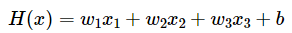

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1) # 랜덤시드 고정

In [29]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [30]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [31]:
# 가설, 비용 함수, 옵티마이저를 선언한 후에 경사 하강법을 1,000회 반복
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(1,nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch  100/1000 w1: 0.673 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.564298
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.498234
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435647
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.376296
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.320047
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266736
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.216203
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.168279
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122853
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079796


### 행렬 연산을 고려하여 파이토치로 구현하기

In [32]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [33]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [34]:
# (5 × 3) 행렬과 (5 × 1) 행렬 을 고려하여
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [35]:
# 행렬곱으로 가설 선언
hypothesis = x_train.matmul(W) + b

In [37]:
# 전체 코드
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/2000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/2000 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/2000 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/2000 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/2000 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/2000 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/2000 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/2000 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/2000 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/2000 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.0711

## nn.Module로 구현하는 선형 회귀

파이토치에서 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현

### 단순 선형 회귀 구현하기

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [46]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [47]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)
print(list(model.parameters())) # model에는 가중치 W와 편향 b가 저장되어져 있음, 두 값 모두 현재는 랜덤 초기화, 두 값 모두 학습의 대상이므로 requires_grad=True가 되어져 있음

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [48]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01) 

In [49]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [53]:
# x에 임의의 값 4를 넣어 모델이 예측하는 y의 값을 확인
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 
# 학습 후의 W와 b의 값을 출력
print(list(model.parameters()))

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


### 다중 선형 회귀 구현

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [69]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [70]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0803, -0.0707,  0.1601]], requires_grad=True), Parameter containing:
tensor([0.0285], requires_grad=True)]


In [71]:
optimizer = optim.SGD(model.parameters(), lr=1e-5) 

In [72]:
nb_epochs = 20000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/20000 Cost: 24821.373047
Epoch  100/20000 Cost: 0.849148
Epoch  200/20000 Cost: 0.825597
Epoch  300/20000 Cost: 0.803225
Epoch  400/20000 Cost: 0.781968
Epoch  500/20000 Cost: 0.761775
Epoch  600/20000 Cost: 0.742599
Epoch  700/20000 Cost: 0.724357
Epoch  800/20000 Cost: 0.707025
Epoch  900/20000 Cost: 0.690548
Epoch 1000/20000 Cost: 0.674883
Epoch 1100/20000 Cost: 0.659985
Epoch 1200/20000 Cost: 0.645810
Epoch 1300/20000 Cost: 0.632342
Epoch 1400/20000 Cost: 0.619514
Epoch 1500/20000 Cost: 0.607307
Epoch 1600/20000 Cost: 0.595680
Epoch 1700/20000 Cost: 0.584620
Epoch 1800/20000 Cost: 0.574083
Epoch 1900/20000 Cost: 0.564048
Epoch 2000/20000 Cost: 0.554477
Epoch 2100/20000 Cost: 0.545363
Epoch 2200/20000 Cost: 0.536672
Epoch 2300/20000 Cost: 0.528388
Epoch 2400/20000 Cost: 0.520490
Epoch 2500/20000 Cost: 0.512939
Epoch 2600/20000 Cost: 0.505737
Epoch 2700/20000 Cost: 0.498873
Epoch 2800/20000 Cost: 0.492311
Epoch 2900/20000 Cost: 0.486038
Epoch 3000/20000 Cost: 0.480047
Epoc

In [73]:
# x에 임의의 입력 [73, 80, 75]를 넣어 모델이 예측하는 y의 값을 확인
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2549]], grad_fn=<AddmmBackward>)


In [74]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.8980, 0.4478, 0.6643]], requires_grad=True), Parameter containing:
tensor([0.0594], requires_grad=True)]


## 클래스로 파이토치 모델 구현하기

### 모델을 클래스로 구현

단순 선형 회귀

In [75]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

In [78]:
# 위의 모델을 클래스로 구현
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x) # 모델 반환

In [79]:
model = LinearRegressionModel()

다중 선형 회귀

In [80]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [82]:
# 위의 모델을 클래스로 구현
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x) # 모델 반환

In [83]:
model = MultivariateLinearRegressionModel()

### 다중 선형 회귀 클래스로 구현

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
torch.manual_seed(1)

In [87]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [88]:
# 클래스로 구현
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [89]:
model = MultivariateLinearRegressionModel()

In [90]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [91]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769
